In [1]:
import pandas as pd
import math 
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle

### Analisis de Datos

In [2]:
#leemos los datos
datos=pd.read_pickle('ALERCE_stamps_2020.pkl', compression='infer')

In [3]:
#queremos saber que posee este diccionario
for i in datos:
    print(i)

images
labels
metadata


In [4]:
#miramos cuantos datos posee imagenes
print('tamaño images: '+str(len(datos['images'])))

tamaño images: 52244


In [5]:
#verificamos si los otros indices poseen la misma cantidad de datos
print('tamaño labels: '+str(len(datos['labels'])))
print('tamaño metadata: '+str(len(datos['metadata'])))

tamaño labels: 52244
tamaño metadata: 52244


In [6]:
#poseen la misma cantidad, vamos oberservando qué se encuentra en cada indice del diccionario
print('Primer Componente dentro de images:')
print('tipo de data: '+str(type((datos['images'][0]))))
print('tamaño : '+str(len((datos['images'][0])))+'\n')

print('Segundo componente dentro de images:')
print('tipo de data: '+str(type((datos['images'][0][0]))))
print('tamaño : '+str(len((datos['images'][0][0])))+'\n')

print('Tercer componente dentro de images:')
print('tipo de data: '+str(type((datos['images'][0][0][0]))))
print('tamaño : '+str(len((datos['images'][0][0][0]))))


Primer Componente dentro de images:
tipo de data: <class 'numpy.ndarray'>
tamaño : 63

Segundo componente dentro de images:
tipo de data: <class 'numpy.ndarray'>
tamaño : 63

Tercer componente dentro de images:
tipo de data: <class 'numpy.ndarray'>
tamaño : 3


In [7]:
'''
Notamos que dentro de images hay fotos 3 'fotos' de 63x63 pixeles.
'''
#Miramos los datos que contiene labels y metadata
print('Ejemplo de datos aleatorios \n')
print('Labels:')
print(datos['labels'][455])
print('Metadata:')
print(datos['metadata'][534])

#vemos que otros datos hay en labels:
print('\n Posibles labels en data:')
a=[]
for i in datos['labels']:
    if i not in a:
        a.append(i)
        print(i)
        


Ejemplo de datos aleatorios 

Labels:
1
Metadata:
[0.04783330112695694 7.248107433319092 1.0 12.351686477661133
 0.861274003982544 14.591768264770508 0 4.619999885559082
 19.043861389160156 0.13484223186969757 212.68586 -8.2040369
 19.90457534790039 0.9070000052452087 2 60 4.685760662351477
 213.29822110820405 49.78237184526629 334.25792680085254 58
 0.9490000009536743 0.09000000357627869]

 Posibles labels en data:
1
0
2
4
3


### Preprocesamiento de datos

In [8]:
#cantidad de imagenes no cuadradas:
list_of_indexes=[]
for i in range(len(datos['images'])):
    if len(datos['images'][i])!=len(datos['images'][i][0]):
        list_of_indexes.append(i)

cantidad=len(list_of_indexes)

sumando=0
#creamos este indice ya que al sacar un indice de la lista, todos los indices se resta uno
#si vamos del mas pequeño al mas grande
for i in list_of_indexes:
    #lo sacamos de la data:
    datos['images'].pop(i-sumando)
    datos['labels'].pop(i-sumando)
    datos['metadata'].pop(i-sumando)
    sumando+=1
        
print('# Imagenes no cuadradas: '+str(cantidad))
print('\n Nuevo largo de data: '+str(len(datos['images'])))
        

# Imagenes no cuadradas: 650

 Nuevo largo de data: 51594


In [9]:
#vemos cuantos datos son NaN y lo cambiamos a 0

cantidad=0
#matriz
for i in range(len(datos['images'])):
    array_nan_index=np.argwhere(np.isnan(datos['images'][i]))
    for j in array_nan_index:
        index_fila=j[0]
        index_columna=j[1]
        index_muestra=j[2]
        datos['images'][i][index_fila][index_columna][index_muestra]=0
    cantidad+=len(array_nan_index)
        
print('# pixeles == NaN: '+str(cantidad))   
print('Cambiados a 0 con exito')

# pixeles == NaN: 9743759
Cambiados a 0 con exito


In [10]:
def normalizar(matrix,matrix_zero,muestra):
    """ recibe matrix y la devuelve normalizada
    """
    maximo=np.amax(matrix[:,:,muestra])
    minimo=np.amin(matrix[:,:,muestra])
    matrix_zero[:,:,muestra]=(matrix[:,:,muestra]-minimo)/maximo
    return matrix_zero

In [11]:
#vamos viendo maximos y minimos, y normalizando

#matriz
dic={'images_norm':[]}

contador=1
for i in range(len(datos['images'])):
    matrix_image=datos['images'][i]
    matriz_zeros_paranormalizar=np.zeros((len(matrix_image),len(matrix_image[0]),3))
    #3 muestras
    for z in range(3):
        matriz_zeros_paranormalizar=normalizar(matrix_image,matriz_zeros_paranormalizar,z)
    dic['images_norm'].append(matriz_zeros_paranormalizar)
    contador+=1

datos.update(dic)        
print('Normalización hecha con exito')  


Normalización hecha con exito


In [12]:
#Observamos si tienen la misma cantidad de imagenes
len(datos['images_norm'])

51594

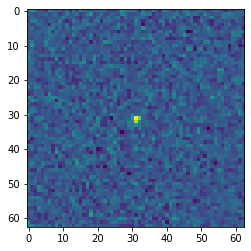

In [13]:
#Muestra 2 de la imagen 56 no normalizada
plt.imshow(datos['images'][56][:,:,2])

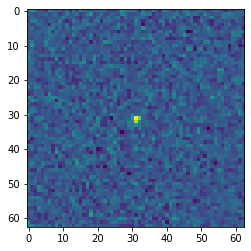

In [14]:
#Muestra 2 de la imagen 56  normalizada
plt.imshow(datos['images_norm'][56][:,:,2])

Observamos que es la misma imagen por lo que la normalización fue realizada con exito en terminos de reescalar los valores sin alterar la imagen que se observa

In [15]:
#Borrar imagenes no normalizadas
del datos['images']

In [16]:
# Función para recortar centros de las imagenes
def recorte(imagen):
    inicio = imagen[21:42]
    recorte = np.zeros([21, 21, 3])
    for i in range(len(inicio)):
        recorte[i] = inicio[i][21:42]
    return recorte

In [17]:
#Recorte de todas las imagenes
del dic['images_norm']
dic={'im_norm21':[]}
for i in range(len(datos['images_norm'])):
    dic['im_norm21'].append(recorte(datos['images_norm'][i]))
datos.update(dic)

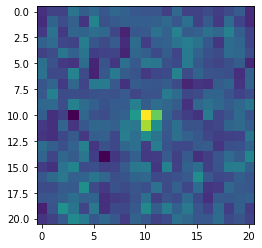

In [18]:
#Vemos la imagen anterior recortada
plt.imshow(datos['im_norm21'][56][:,:,2])

In [19]:
# write python dict to a file
output = open('ALERCE_stamps_2020_norm.pkl', 'wb')
pickle.dump(datos, output)
output.close()

## Split sets

In [93]:
def get_index_cat(cat):
    index_list = []
    for i in range(len(datos['labels'])):
        if datos['labels'][i]==cat:
            index_list.append(i)
    return index_list

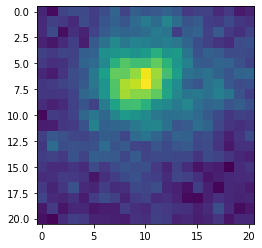

In [94]:
#Visulaización de una supernova
sn = get_index_cat(1)[212]
plt.imshow(datos['im_norm21'][sn][:,:,1])

In [95]:
for k in range(5):
    print("Número de datos de la categoría", k, ":", len(get_index_cat(k)))

Número de datos de la categoría 0 : 14742
Número de datos de la categoría 1 : 1596
Número de datos de la categoría 2 : 14723
Número de datos de la categoría 3 : 9799
Número de datos de la categoría 4 : 10734


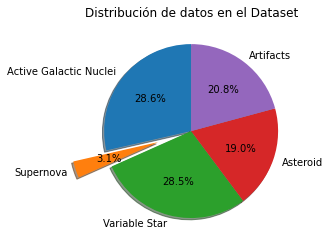

In [13]:
#Grafico distribución de datos
x=np.array(['Active Galactic Nuclei', 'Supernova', 'Variable Star', 'Asteroid', 'Artifacts'])
y=np.array([14742, 1596, 14723, 9799, 10734])
explode = [0, 0.4, 0, 0, 0]  # Destacar algunos

plt.pie(y, labels=x, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribución de datos en el Dataset')
plt.show()

Categorías desbalanceadas

### Creación de listas training y validation

In [96]:
# Genera listas de índices para train, validation y test
def get_sets_index():
    val_index=np.array([])
    test_index=np.array([])
    train_index=np.array([])
    for k in range (5):
        L=get_index_cat(k)
        random.shuffle(L)
        test_index=np.append(test_index,L[0:200])
        val_index=np.append(val_index,L[200:300])
        train_index=np.append(train_index,L[300:])
        random.shuffle(test_index)
        random.shuffle(val_index)
        random.shuffle(train_index)
    return train_index, val_index, test_index

In [97]:
train_index, val_index, test_index = get_sets_index()

In [92]:
#Corroboración dimensional de sets
print(len(train_index))
print(len(val_index))
print(len(test_index))

50094
500
1000


In [2]:
##Crea diccionarios con los sets de datos
#def build_sets():
#    train_index, val_index, test_index = get_sets_index() #obtenemos los indices
#    test_set={'images':[], 'labels':[], 'metadata':[]} #creacion diccionario con testing set
#    val_set={'images':[], 'labels':[], 'metadata':[]} #creacion diccionario con validation set
#    train_set={'images':[], 'labels':[], 'metadata':[]} #creacion diccionario con training set
#    for i in range(len(train_index)): #añade los elementos de los indices de train_index al train_set
#        k=int(train_index[i])
#        train_set['images'].append(datos['images_norm'][k])
#        train_set['labels'].append(datos['labels'][k])
#        train_set['metadata'].append(datos['metadata'][k])
#    for i in range(len(val_index)): #añade los elementos de los indices de val_index al val_set
#        k=int(val_index[i])
#        val_set['images'].append(datos['images_norm'][k])
#        val_set['labels'].append(datos['labels'][k])
#        val_set['metadata'].append(datos['metadata'][k])
#    for i in range(len(test_index)): #añade los elementos de los indices de test_index al test_set
#        k=int(test_index[i])
#        test_set['images'].append(datos['images_norm'][k])
#        test_set['labels'].append(datos['labels'][k])
#        test_set['metadata'].append(datos['metadata'][k])
#    return train_set, val_set, test_set

In [ ]:
#train_set, val_set, test_set=build_sets()
#x_train = train_set['images']
#x_val = val_set['images']
#x_test = test_set['images']
#y_train = train_set['labels']
#y_val = val_set['labels']
#y_test = test_set['labels']

In [100]:
def build_sets():
    x_train = []
    x_val = []
    x_test = []
    y_train = []
    y_val = []
    y_test = []
    train_index, val_index, test_index = get_sets_index() #obtenemos los indices
    for i in range(len(train_index)):
        k=int(train_index[i])
        x_train.append(datos['im_norm21'][k])
        y_train.append(datos['labels'][k])
    for i in range(len(val_index)):
        k=int(val_index[i])
        x_val.append(datos['im_norm21'][k])
        y_val.append(datos['labels'][k])
    for i in range(len(test_index)):
        k=int(test_index[i])
        x_test.append(datos['im_norm21'][k])
        y_test.append(datos['labels'][k])
    return x_train, x_val, x_test, y_train, y_val, y_test

In [103]:
x_train, x_val, x_test, y_train, y_val, y_test = build_sets()

#no se si combiene pasar a np.array

#x_train = np.array(x_train)
#x_val = np.array(x_val)
#x_test = np.array(x_test)
#y_train = np.array(y_train)
#y_val = np.array(y_val)
#y_test = np.array(y_test)